In [78]:
#import the minst csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read the csv file
df = pd.read_csv('mnist_train.csv')
df.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


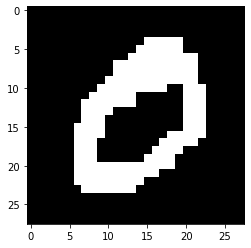

In [10]:
#split the data into features and labels
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

#show the image
plt.imshow(X[0].reshape(28,28),cmap='gray')


#convert the data into 1 and 0
X[X>0]=1

#plot the image

plt.imshow(X[1].reshape(28,28),cmap='gray')

In [11]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

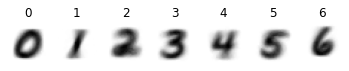

1.005813953488372
0.004464285714285714
[[0.191]
 [0.22 ]
 [0.198]
 [0.191]
 [0.214]
 [0.18 ]
 [0.2  ]
 [0.224]
 [0.172]
 [0.21 ]]


In [147]:
# Every Pixel has 2 values and 10 classes
# So we need 2*784*10 parameters
# We will use 2*784*10 = 15680 parameters

#initialize the parameters
w = np.ones((2, 784, 10)) #otherwise 0 probabilities ruin everything

#w[j][i][k] 
#w: occurence; proportional to proability
#j: Pixel value 0 or 1
#i: Pixel index
#k: Class

#Probability of class k given pixel i has value j

occurence = np.zeros((10, 1))

for i in range(0, 2000): 
        for j in range(0, 784):
            w[0][j][y[i]] += 1 - X[i][j]
            w[1][j][y[i]] += X[i][j]
        occurence[y[i]] += 1
        
#normalize the parameters

for i in range(0, 10):
    w[0][:,i] = w[0][:,i]/occurence[i] * 1
    w[1][:,i] = w[1][:,i]/occurence[i] * 1

#normalize the occurence
occurence = occurence/1000
        

        

# plot 5 images of 5 different classes next to each other
for i in range(0, 7):
    plt.subplot(1, 7, i+1)
    plt.imshow(w[0][:,i].reshape(28,28),cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()

# print max and min values of the parameters
print(np.max(w))
print(np.min(w))
print(occurence)


 



In [124]:
def classified(classify):
    #check the probability of the image for each class
    prob = np.ones((10, 1))
    prob = prob*occurence

    for i in range(0, 10):
        for j in range(0, 784):
            prob[i] *= w[classify[j]][j][i]
            
            
    #normalize the probabilities between 0 and 1
    prob = prob/np.max(prob)

    return prob


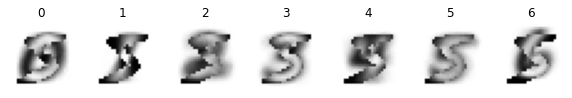

In [149]:
# plot w[classify[j]][j][i]

classify = X[0]

c = np.zeros((784, 1)) 

for i in range(0, 7):
    for j in range(0, 784):
        c[j] = w[classify[j]][j][i]

    plt.subplot(1, 7, i+1)
    
    plt.imshow(c.reshape(28,28),cmap='gray')
    
    plt.title(i)
    plt.axis('off')
    #make the plot bigger
    plt.gcf().set_size_inches(10, 10)

plt.show()




In [76]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set

y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 54.19583333333333


7
[9]
----
2
[6]
----
8
[1]
----
6
[6]
----
9
[9]
----


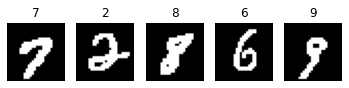

In [116]:
start = 15
#classify a random image
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i + start].reshape(28,28),cmap='gray')
    plt.title(np.argmax(classified(X[i + start])))
    plt.axis('off')
    
    
    print(np.argmax(classified(X[i + start])))
    #print the result of gnb 
    print(gnb.predict(X[i + start].reshape(1, -1)))
    print("----")

[[-17. -72. -10. -34.  -4.   0.  -8. -52. -12. -10.]]
prediction:  5
actual:  5


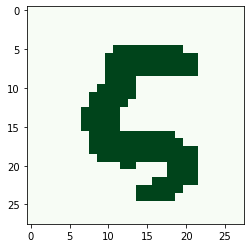

[[-75. -62. -54. -40. -64. -27. -73. -74.   0. -48.]]
prediction:  8
actual:  8


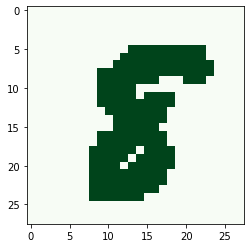

[[-52. -53.  -7.  -7.  -6. -10. -37. -27.  -1.   0.]]
prediction:  9
actual:  8


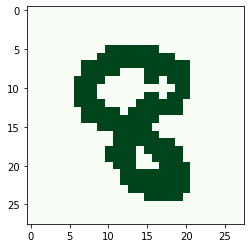

wrong prediction
prediction:  9
actual:  8


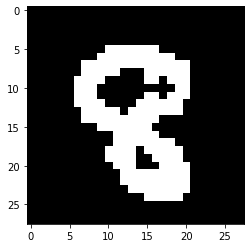

[[-89. -97. -62. -43.  -5. -36. -62. -18. -33.   0.]]
prediction:  9
actual:  4


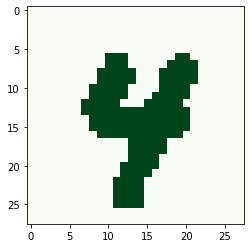

wrong prediction
prediction:  9
actual:  4


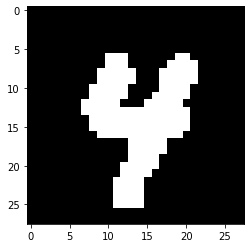

[[ -39. -175.    0.  -66.  -65.  -63.  -49. -127.  -77. -101.]]
prediction:  2
actual:  2


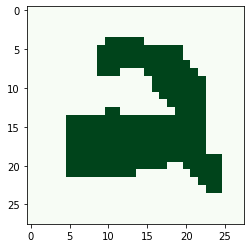

[[ -61. -140.  -40.  -62.  -59.  -45.    0. -112.  -57.  -72.]]
prediction:  6
actual:  6


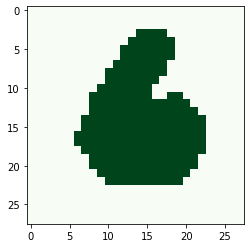

[[-93. -47. -61. -42. -24. -30. -62. -26. -29.   0.]]
prediction:  9
actual:  9


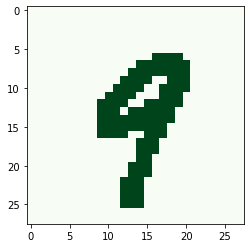

[[-100. -149.  -97.  -63.  -57.  -69. -112.    0.  -74.  -32.]]
prediction:  7
actual:  7


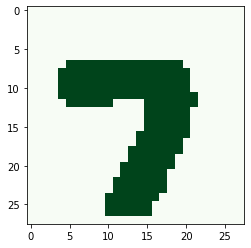

[[-112.    0.  -55.  -45.  -52.  -33.  -55.  -41.  -32.  -34.]]
prediction:  1
actual:  1


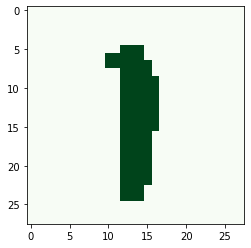

[[   0. -227.  -80.  -84. -114.  -65.  -95. -171.  -93. -152.]]
prediction:  0
actual:  0


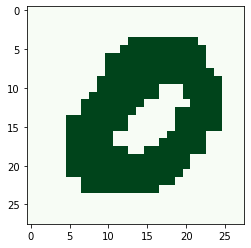

In [142]:
#evaluate the model
for i in range(2000,2010): 
    clasf = classified(X[i])
    prediction = np.argmax(clasf)

    #print certainties with only 2 decimal places
    print(np.around(np.log10(clasf), decimals=0).T)


    
    print("prediction: ", prediction)
    print("actual: ", y[i])
    plt.imshow(X[i].reshape(28,28),cmap='Greens')
    plt.show()

    if prediction != y[i]:
        print("wrong prediction")
        print("prediction: ", prediction)
        print("actual: ", y[i])
        plt.imshow(X[i].reshape(28,28),cmap='gray')
        plt.show()
        

In [148]:
import time

correct = 0
wrong = 0
starttime = time.time()

for i in range(3000, 4000):
    clasf = classified(X[i])
    prediction = np.argmax(clasf)

    print("prediction: ", prediction, "actual: ", y[i])

    if prediction == y[i]:
        correct += 1
    else:
        wrong += 1

    
print("correct: ", correct)
print("wrong: ", wrong)
print("accuracy: ", correct/(correct+wrong))
print("time: ", time.time() - starttime)

"""
Training set: 1000
correct:  807
wrong:  193
accuracy:  0.807
time:  26.954700469970703

Training set: 2000
correct:  823
wrong:  177
accuracy:  0.823
time:  31.085136651992798
"""
    

prediction:  4 actual:  9
prediction:  5 actual:  0
prediction:  9 actual:  8
prediction:  8 actual:  8
prediction:  1 actual:  1
prediction:  3 actual:  3
prediction:  2 actual:  2
prediction:  5 actual:  5
prediction:  7 actual:  7
prediction:  4 actual:  4
prediction:  9 actual:  7
prediction:  8 actual:  8
prediction:  0 actual:  0
prediction:  3 actual:  3
prediction:  9 actual:  8
prediction:  0 actual:  0
prediction:  0 actual:  0
prediction:  2 actual:  2
prediction:  4 actual:  4
prediction:  1 actual:  1
prediction:  9 actual:  9
prediction:  0 actual:  0
prediction:  9 actual:  9
prediction:  2 actual:  2
prediction:  0 actual:  0
prediction:  5 actual:  5
prediction:  3 actual:  8
prediction:  8 actual:  8
prediction:  8 actual:  8
prediction:  8 actual:  8
prediction:  2 actual:  9
prediction:  5 actual:  5
prediction:  3 actual:  8
prediction:  3 actual:  3
prediction:  5 actual:  3
prediction:  0 actual:  0
prediction:  6 actual:  6
prediction:  4 actual:  4
prediction: 

'\nTraining set: 1000\ncorrect:  807\nwrong:  193\naccuracy:  0.807\ntime:  26.954700469970703\n'

In [145]:
correct = 0
wrong = 0
starttime = time.time()

for i in range(0, 1000):
    clasf = classified(X[i])
    #predict using gnb
    prediction = gnb.predict(X[i].reshape(1, -1))

    print("prediction: ", prediction, "actual: ", y[i])

    if prediction == y[i]:
        correct += 1
    else:
        wrong += 1

    
print("correct: ", correct)
print("wrong: ", wrong)
print("accuracy: ", correct/(correct+wrong))
print("time: ", time.time() - starttime)

#1000 training images
#correct:  552
#wrong:  448
#accuracy:  0.552
#time:  27.94501757621765

prediction:  [3] actual:  5
prediction:  [0] actual:  0
prediction:  [4] actual:  4
prediction:  [1] actual:  1
prediction:  [9] actual:  9
prediction:  [0] actual:  2
prediction:  [1] actual:  1
prediction:  [8] actual:  3
prediction:  [1] actual:  1
prediction:  [8] actual:  4
prediction:  [8] actual:  3
prediction:  [8] actual:  5
prediction:  [3] actual:  3
prediction:  [6] actual:  6
prediction:  [1] actual:  1
prediction:  [9] actual:  7
prediction:  [6] actual:  2
prediction:  [1] actual:  8
prediction:  [6] actual:  6
prediction:  [9] actual:  9
prediction:  [3] actual:  4
prediction:  [0] actual:  0
prediction:  [9] actual:  9
prediction:  [1] actual:  1
prediction:  [6] actual:  1
prediction:  [0] actual:  2
prediction:  [9] actual:  4
prediction:  [3] actual:  3
prediction:  [4] actual:  2
prediction:  [7] actual:  7
prediction:  [3] actual:  3
prediction:  [8] actual:  8
prediction:  [6] actual:  6
prediction:  [7] actual:  9
prediction:  [0] actual:  0
prediction:  [8] act